In [4]:
import matplotlib.pyplot as plt
import imageio as imo
import numpy as np
import scipy.ndimage as ndi
import cv2

In [5]:
im = imo.imread('../datasets/azm/IM-0009-0454.dcm')
#im.meta

(-0.5, 511.5, 511.5, -0.5)

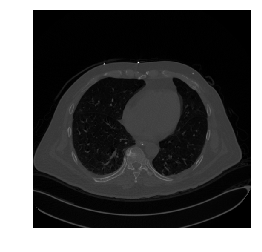

In [6]:
plt.imshow(im, cmap='gray')
plt.axis('off')

In [7]:
path = '../datasets/azm/'

In [31]:
vol = imo.mvolread(path)

Reading DICOM (examining files): 1/1102 files (0.1%37/1102 files (3.477/1102 files (7.0116/1102 files (10.5156/1102 files (14.2194/1102 files (17.6236/1102 files (21.4277/1102 files (25.1320/1102 files (29.0362/1102 files (32.8403/1102 files (36.6441/1102 files (40.0480/1102 files (43.6519/1102 files (47.1560/1102 files (50.8601/1102 files (54.5642/1102 files (58.3682/1102 files (61.9722/1102 files (65.5760/1102 files (69.0796/1102 files (72.2816/1102 files (74.0844/1102 files (76.6883/1102 files (80.1923/1102 files (83.8961/1102 files (87.21000/1102 files (90.7%1040/1102 files (94.4%1080/1102 files (98.0  Warn: sampling does not match.
Reading DICOM (examining files): 1080/1102 files (98.0%1102/1102 files (100.0%)
  Found 4 correct series.
Reading DICOM (loading data): 2/2  (100.0%)
Reading DICOM (loading data): 2/2  (100.0%)
Reading DICOM (loading data): 8/558  (1.4%34/558  (6.158/558  (10.4%80/558  (14.3%107/558  (19.2134/558  (24.0162/558  (29.0191/558  (34.2218/558  (39.1246/558  

In [33]:
vol.

[Array([[[  -56,   -57,   -58, ...,   -71,   -67,   -66],
         [  -56,   -58,   -58, ...,   -70,   -67,   -65],
         [  -57,   -58,   -59, ...,   -69,   -66,   -64],
         ...,
         [-1024, -1024, -1024, ..., -1024, -1024, -1024],
         [-1024, -1024, -1024, ..., -1024, -1024, -1024],
         [-1024, -1024, -1024, ..., -1024, -1024, -1024]],
 
        [[  -56,   -57,   -58, ...,   -71,   -67,   -66],
         [  -56,   -58,   -58, ...,   -70,   -67,   -65],
         [  -57,   -58,   -59, ...,   -69,   -66,   -64],
         ...,
         [-1024, -1024, -1024, ..., -1024, -1024, -1024],
         [-1024, -1024, -1024, ..., -1024, -1024, -1024],
         [-1024, -1024, -1024, ..., -1024, -1024, -1024]]], dtype=int16),
 Array([[[-1024, -1024, -1024, ..., -1024, -1024, -1024],
         [-1024, -1024, -1024, ..., -1024, -1024, -1024],
         [-1024, -1024, -1024, ..., -1024, -1024, -1024],
         ...,
         [  -52,   -53,   -52, ...,   -65,   -62,   -62],
         [ 

(-0.5, 511.5, 511.5, -0.5)

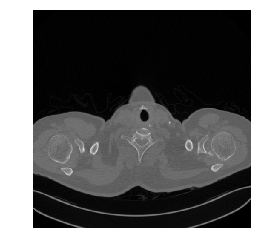

In [145]:
plt.imshow(vol[2][0], cmap='gray')
plt.axis('off')

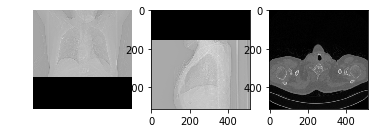

In [146]:
fig, axes = plt.subplots(nrows=1,
ncols=3)
axes[0].imshow(vol[0][1],cmap='gray')
axes[1].imshow(vol[1][0],cmap='gray')
axes[2].imshow(vol[2][0],cmap='gray')

for ax in axes:
    ax.axis('off')
    plt.show()

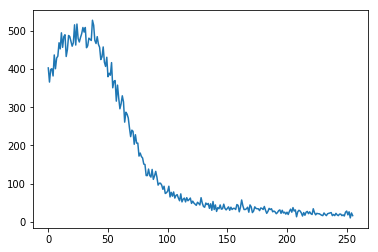

In [147]:
im = vol[2][59]
hist = ndi.histogram(im, min=0, max=255, bins=256)
plt.plot(hist)

In [148]:
filt = ndi.gaussian_filter(im, sigma=2)
mask = filt > 300
labels, nlabels = ndi.label(mask)

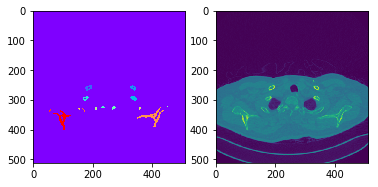

In [151]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].imshow(labels, cmap='rainbow')
axes[1].imshow(im)


(-0.5, 511.5, 511.5, -0.5)

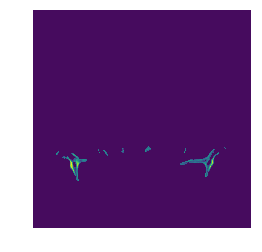

In [152]:
plt.imshow(np.where(labels > 6, im, 0))
plt.axis('off')

In [153]:
nlabels

15

In [158]:
boxes = ndi.find_objects(labels)
boxes[0]

(slice(236L, 239L, None), slice(324L, 327L, None))